In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
# 1. Chargement des données
data = load_iris()

In [3]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
print(data.target.shape, data.data.shape)

(150,) (150, 4)


In [8]:
# separation de X et y
X, y = data.data, data.target
# normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# encodage des sorties
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

In [11]:
# Division en apprentissage et validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du réseau de neurones
def initialize_nn(input_dim, hidden_dim, output_dim):
  params = {
      'W1': np.random.randn(input_dim, hidden_dim),
      'b1': np.zeros((1, hidden_dim)),
      'W2': np.random.randn(hidden_dim, output_dim),
      'b2': np.zeros((1, output_dim))
  }
  return params

# Fonctions d'activation et propagation avant
def tanh(x):
  return np.tanh(x)

def forward_pass(X, params):
  Z1 = X.dot(params['W1']) + params['b1']
  A1 = tanh(Z1)
  Z2 = A1.dot(params['W2']) + params['b2']
  A2 = tanh(Z2)  # Sortie finale avec tangente hyperbolique
  return A2

# Fonction de coût (erreur quadratique moyenne)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Implémentation de l'algorithme PSO
def pso(X, y, input_dim, hidden_dim, output_dim, num_particles=30, max_iter=100):
    # Initialisation des particules (poids et biais aplatis)
    dim = (input_dim * hidden_dim) + hidden_dim + (hidden_dim * output_dim) + output_dim
    particles = np.random.randn(num_particles, dim)
    velocities = np.random.randn(num_particles, dim) * 0.1

    # Meilleures positions individuelles et globale
    personal_best_positions = particles.copy()
    personal_best_scores = np.full(num_particles, np.inf)
    global_best_position = None
    global_best_score = np.inf

    # Paramètres PSO
    w = 0.7  # Inertie
    c1 = 1.5  # Coefficient cognitif
    c2 = 1.5  # Coefficient social

    # Fonction pour reconstruire les paramètres du réseau à partir d'un vecteur aplati
    def decode_params(vector):
        W1 = vector[:input_dim * hidden_dim].reshape(input_dim, hidden_dim)
        b1 = vector[input_dim * hidden_dim:input_dim * hidden_dim + hidden_dim].reshape(1, hidden_dim)
        W2 = vector[input_dim * hidden_dim + hidden_dim:-output_dim].reshape(hidden_dim, output_dim)
        b2 = vector[-output_dim:].reshape(1, output_dim)
        return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

    # Boucle d'optimisation
    for t in range(max_iter):
        for i in range(num_particles):
            # Reconstruction des paramètres et propagation avant
            params = decode_params(particles[i])
            y_pred = forward_pass(X, params)
            error = mean_squared_error(y, y_pred)
            # Mise à jour de la meilleure position personnelle
            if error < personal_best_scores[i]:
                personal_best_scores[i] = error
                personal_best_positions[i] = particles[i].copy()
            # Mise à jour de la meilleure position globale
            if error < global_best_score:
                global_best_score = error
                global_best_position = particles[i].copy()
        # Mise à jour des vitesses et positions des particules
        for i in range(num_particles):
            r1, r2 = np.random.rand(), np.random.rand()
            velocities[i] = (w * velocities[i] + c1 * r1 * (personal_best_positions[i] - particles[i]) + c2 * r2 * (global_best_position - particles[i]))
            particles[i] += velocities[i]
        # Affichage de la progression
        print(f"Iteration {t+1}/{max_iter}, Best Error: {global_best_score:.5f}")

    # Retourner les meilleurs paramètres
    return decode_params(global_best_position)

# Apprentissage avec PSO
input_dim, hidden_dim, output_dim = X_train.shape[1], 10, y_train.shape[1]
params_pso = pso(X_train, y_train, input_dim, hidden_dim, output_dim)

Iteration 1/100, Best Error: 0.34472
Iteration 2/100, Best Error: 0.34472
Iteration 3/100, Best Error: 0.33863
Iteration 4/100, Best Error: 0.32563
Iteration 5/100, Best Error: 0.31976
Iteration 6/100, Best Error: 0.31976
Iteration 7/100, Best Error: 0.31976
Iteration 8/100, Best Error: 0.31976
Iteration 9/100, Best Error: 0.24959
Iteration 10/100, Best Error: 0.23872
Iteration 11/100, Best Error: 0.22627
Iteration 12/100, Best Error: 0.22425
Iteration 13/100, Best Error: 0.22155
Iteration 14/100, Best Error: 0.21973
Iteration 15/100, Best Error: 0.21973
Iteration 16/100, Best Error: 0.21973
Iteration 17/100, Best Error: 0.20675
Iteration 18/100, Best Error: 0.20675
Iteration 19/100, Best Error: 0.20675
Iteration 20/100, Best Error: 0.18572
Iteration 21/100, Best Error: 0.18572
Iteration 22/100, Best Error: 0.17741
Iteration 23/100, Best Error: 0.15315
Iteration 24/100, Best Error: 0.13959
Iteration 25/100, Best Error: 0.12982
Iteration 26/100, Best Error: 0.11832
Iteration 27/100, Bes


Performance finale du modèle PSO:
Erreur d'apprentissage: 0.09562
Erreur de validation: 0.08276


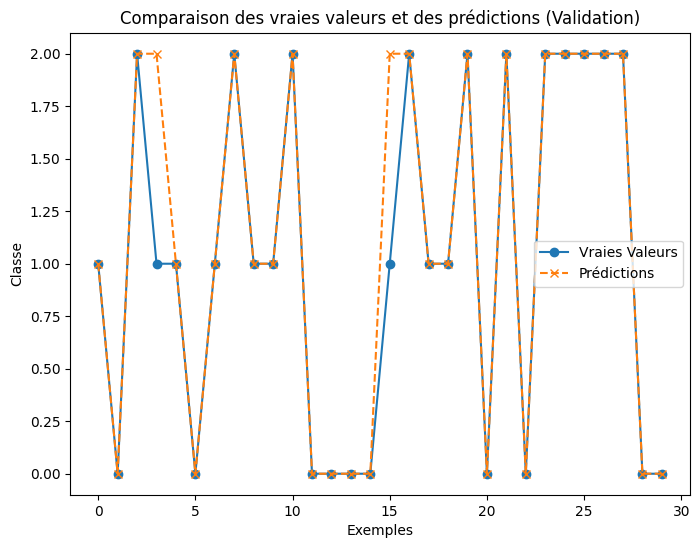

In [12]:
# Évaluation du modèle
train_predictions = forward_pass(X_train, params_pso)
val_predictions = forward_pass(X_val, params_pso)

train_error = mean_squared_error(y_train, train_predictions)
val_error = mean_squared_error(y_val, val_predictions)

print("\nPerformance finale du modèle PSO:")
print(f"Erreur d'apprentissage: {train_error:.5f}")
print(f"Erreur de validation: {val_error:.5f}")

# Visualisation des résultats
plt.figure(figsize=(8, 6))
plt.plot(y_val.argmax(axis=1), label="Vraies Valeurs", marker='o')
plt.plot(val_predictions.argmax(axis=1), label="Prédictions", linestyle='--', marker='x')
plt.legend()
plt.title("Comparaison des vraies valeurs et des prédictions (Validation)")
plt.xlabel("Exemples")
plt.ylabel("Classe")
plt.show()

Generation 1/100, Best Error: 1.54593
Generation 2/100, Best Error: 0.38550
Generation 3/100, Best Error: 0.38550
Generation 4/100, Best Error: 0.38550
Generation 5/100, Best Error: 0.37485
Generation 6/100, Best Error: 0.37485
Generation 7/100, Best Error: 0.37485
Generation 8/100, Best Error: 0.37308
Generation 9/100, Best Error: 0.37055
Generation 10/100, Best Error: 0.36830
Generation 11/100, Best Error: 0.36830
Generation 12/100, Best Error: 0.22689
Generation 13/100, Best Error: 0.22689
Generation 14/100, Best Error: 0.22689
Generation 15/100, Best Error: 0.22689
Generation 16/100, Best Error: 0.21714
Generation 17/100, Best Error: 0.21714
Generation 18/100, Best Error: 0.20309
Generation 19/100, Best Error: 0.20309
Generation 20/100, Best Error: 0.20309
Generation 21/100, Best Error: 0.20309
Generation 22/100, Best Error: 0.20309
Generation 23/100, Best Error: 0.20309
Generation 24/100, Best Error: 0.20047
Generation 25/100, Best Error: 0.20047
Generation 26/100, Best Error: 0.2

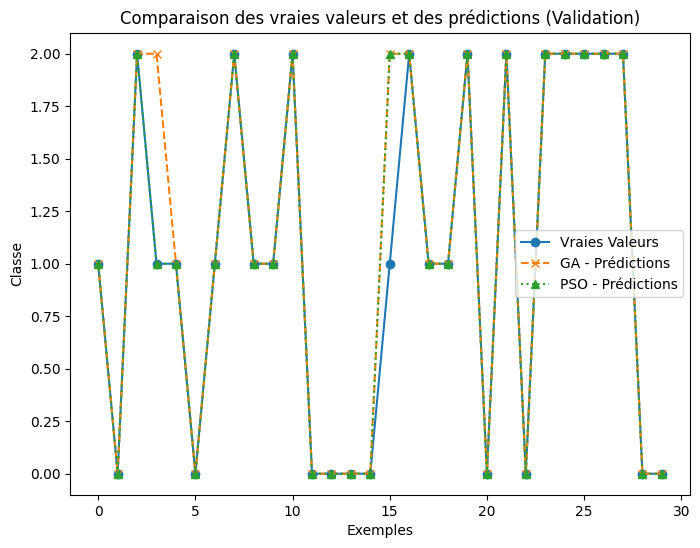

In [13]:
# Comparation de GA et PSO
# Chargement et préparation des données
data = load_iris()
X, y = data.data, data.target

# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encodage one-hot des sorties
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Division en apprentissage et validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du réseau de neurones
def initialize_nn(input_dim, hidden_dim, output_dim):
  params = {
      'W1': np.random.randn(input_dim, hidden_dim),
      'b1': np.zeros((1, hidden_dim)),
      'W2': np.random.randn(hidden_dim, output_dim),
      'b2': np.zeros((1, output_dim))
  }
  return params

# Fonctions d'activation et propagation avant
def tanh(x):
  return np.tanh(x)

def forward_pass(X, params):
  Z1 = X.dot(params['W1']) + params['b1']
  A1 = tanh(Z1)
  Z2 = A1.dot(params['W2']) + params['b2']
  A2 = tanh(Z2)
  return A2

# Fonction de coût
def mean_squared_error(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

# PSO (existant)
def pso(X, y, input_dim, hidden_dim, output_dim, num_particles=30, max_iter=100):
  dim = (input_dim * hidden_dim) + hidden_dim + (hidden_dim * output_dim) + output_dim
  particles = np.random.randn(num_particles, dim)
  velocities = np.random.randn(num_particles, dim) * 0.1
  personal_best_positions = particles.copy()
  personal_best_scores = np.full(num_particles, np.inf)
  global_best_position = None
  global_best_score = np.inf

  w, c1, c2 = 0.7, 1.5, 1.5

  def decode_params(vector):
      W1 = vector[:input_dim * hidden_dim].reshape(input_dim, hidden_dim)
      b1 = vector[input_dim * hidden_dim:input_dim * hidden_dim + hidden_dim].reshape(1, hidden_dim)
      W2 = vector[input_dim * hidden_dim + hidden_dim:-output_dim].reshape(hidden_dim, output_dim)
      b2 = vector[-output_dim:].reshape(1, output_dim)
      return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

  for t in range(max_iter):
      for i in range(num_particles):
          params = decode_params(particles[i])
          y_pred = forward_pass(X, params)
          error = mean_squared_error(y, y_pred)
          if error < personal_best_scores[i]:
              personal_best_scores[i] = error
              personal_best_positions[i] = particles[i].copy()
          if error < global_best_score:
              global_best_score = error
              global_best_position = particles[i].copy()

      for i in range(num_particles):
          r1, r2 = np.random.rand(), np.random.rand()
          velocities[i] = (w * velocities[i] +
                            c1 * r1 * (personal_best_positions[i] - particles[i]) +
                            c2 * r2 * (global_best_position - particles[i]))
          particles[i] += velocities[i]

      print(f"Iteration {t+1}/{max_iter}, Best Error: {global_best_score:.5f}")
  return decode_params(global_best_position)

# Algorithme Génétique (GA)
def genetic_algorithm(X, y, input_dim, hidden_dim, output_dim, population_size=30, generations=100, mutation_rate=0.1):
  dim = (input_dim * hidden_dim) + hidden_dim + (hidden_dim * output_dim) + output_dim
  population = np.random.randn(population_size, dim)

  def decode_params(vector):
    W1 = vector[:input_dim * hidden_dim].reshape(input_dim, hidden_dim)
    b1 = vector[input_dim * hidden_dim:input_dim * hidden_dim + hidden_dim].reshape(1, hidden_dim)
    W2 = vector[input_dim * hidden_dim + hidden_dim:-output_dim].reshape(hidden_dim, output_dim)
    b2 = vector[-output_dim:].reshape(1, output_dim)
    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

  def fitness(ind):
    params = decode_params(ind)
    y_pred = forward_pass(X, params)
    return mean_squared_error(y, y_pred)

  for gen in range(generations):
    scores = np.array([fitness(ind) for ind in population])
    sorted_indices = scores.argsort()
    population = population[sorted_indices]
    best_score = scores[0]

    next_population = population[:population_size // 2]
    while len(next_population) < population_size:
        parents = population[np.random.choice(population_size // 2, 2, replace=False)]
        crossover_point = np.random.randint(dim)
        child = np.concatenate([parents[0][:crossover_point], parents[1][crossover_point:]])
        if np.random.rand() < mutation_rate:
            child += np.random.randn(dim) * 0.1
        next_population = np.vstack([next_population, child])
    population = next_population[:population_size]

    print(f"Generation {gen+1}/{generations}, Best Error: {best_score:.5f}")
  return decode_params(population[0])

# Apprentissage avec GA
params_ga = genetic_algorithm(X_train, y_train, X_train.shape[1], 10, y_train.shape[1])

# Comparaison finale
params_pso = pso(X_train, y_train, X_train.shape[1], 10, y_train.shape[1])

train_predictions_ga = forward_pass(X_train, params_ga)
val_predictions_ga = forward_pass(X_val, params_ga)
train_error_ga = mean_squared_error(y_train, train_predictions_ga)
val_error_ga = mean_squared_error(y_val, val_predictions_ga)

train_predictions_pso = forward_pass(X_train, params_pso)
val_predictions_pso = forward_pass(X_val, params_pso)
train_error_pso = mean_squared_error(y_train, train_predictions_pso)
val_error_pso = mean_squared_error(y_val, val_predictions_pso)

print("\nPerformance finale du modèle GA:")
print(f"Erreur d'apprentissage: {train_error_ga:.5f}")
print(f"Erreur de validation: {val_error_ga:.5f}")

print("\nPerformance finale du modèle PSO:")
print(f"Erreur d'apprentissage: {train_error_pso:.5f}")
print(f"Erreur de validation: {val_error_pso:.5f}")

# Visualisation des résultats
plt.figure(figsize=(8, 6))
plt.plot(y_val.argmax(axis=1), label="Vraies Valeurs", marker='o')
plt.plot(val_predictions_ga.argmax(axis=1), label="GA - Prédictions", linestyle='--', marker='x')
plt.plot(val_predictions_pso.argmax(axis=1), label="PSO - Prédictions", linestyle=':', marker='^')
plt.legend()
plt.title("Comparaison des vraies valeurs et des prédictions (Validation)")
plt.xlabel("Exemples")
plt.ylabel("Classe")
plt.show()


In [14]:
# COMPARATION de ACO & GWO
# Chargement et préparation des données
data = load_iris()
X, y = data.data, data.target

# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encodage one-hot des sorties
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Division en apprentissage et validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du réseau de neurones
def initialize_nn(input_dim, hidden_dim, output_dim):
  params = {
      'W1': np.random.randn(input_dim, hidden_dim),
      'b1': np.zeros((1, hidden_dim)),
      'W2': np.random.randn(hidden_dim, output_dim),
      'b2': np.zeros((1, output_dim))
  }
  return params

# Fonctions d'activation et propagation avant
def tanh(x):
  return np.tanh(x)

def forward_pass(X, params):
  Z1 = X.dot(params['W1']) + params['b1']
  A1 = tanh(Z1)
  Z2 = A1.dot(params['W2']) + params['b2']
  A2 = tanh(Z2)
  return A2

# Fonction de coût
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Grey Wolf Optimizer (GWO)
def gwo(X, y, input_dim, hidden_dim, output_dim, wolves=30, max_iter=100):
  dim = (input_dim * hidden_dim) + hidden_dim + (hidden_dim * output_dim) + output_dim
  positions = np.random.randn(wolves, dim)

  def decode_params(vector):
    W1 = vector[:input_dim * hidden_dim].reshape(input_dim, hidden_dim)
    b1 = vector[input_dim * hidden_dim:input_dim * hidden_dim + hidden_dim].reshape(1, hidden_dim)
    W2 = vector[input_dim * hidden_dim + hidden_dim:-output_dim].reshape(hidden_dim, output_dim)
    b2 = vector[-output_dim:].reshape(1, output_dim)
    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

  def fitness(position):
    params = decode_params(position)
    y_pred = forward_pass(X, params)
    return mean_squared_error(y, y_pred)

  alpha, beta, delta = np.inf, np.inf, np.inf
  alpha_pos, beta_pos, delta_pos = None, None, None

  for t in range(max_iter):
      for i in range(wolves):
          score = fitness(positions[i])
          if score < alpha:
              delta, delta_pos = beta, beta_pos
              beta, beta_pos = alpha, alpha_pos
              alpha, alpha_pos = score, positions[i].copy()
          elif score < beta:
              delta, delta_pos = beta, beta_pos
              beta, beta_pos = score, positions[i].copy()
          elif score < delta:
              delta, delta_pos = score, positions[i].copy()

      a = 2 - t * (2 / max_iter)
      for i in range(wolves):
          for d in range(dim):
              r1, r2 = np.random.rand(), np.random.rand()
              A1, C1 = 2 * a * r1 - a, 2 * r2
              D_alpha = abs(C1 * alpha_pos[d] - positions[i][d])
              X1 = alpha_pos[d] - A1 * D_alpha

              r1, r2 = np.random.rand(), np.random.rand()
              A2, C2 = 2 * a * r1 - a, 2 * r2
              D_beta = abs(C2 * beta_pos[d] - positions[i][d])
              X2 = beta_pos[d] - A2 * D_beta

              r1, r2 = np.random.rand(), np.random.rand()
              A3, C3 = 2 * a * r1 - a, 2 * r2
              D_delta = abs(C3 * delta_pos[d] - positions[i][d])
              X3 = delta_pos[d] - A3 * D_delta

              positions[i][d] = (X1 + X2 + X3) / 3
      print(f"Iteration {t+1}/{max_iter}, Best Error: {alpha:.5f}")
  return decode_params(alpha_pos)

# Ant Colony Optimization (ACO)
def aco(X, y, input_dim, hidden_dim, output_dim, num_ants=30, max_iter=100):
    dim = (input_dim * hidden_dim) + hidden_dim + (hidden_dim * output_dim) + output_dim
    pheromones = np.ones(dim)
    evaporation_rate = 0.5
    alpha = 1  # influence of pheromones
    beta = 2   # influence of heuristic

    def decode_params(vector):
        W1 = vector[:input_dim * hidden_dim].reshape(input_dim, hidden_dim)
        b1 = vector[input_dim * hidden_dim:input_dim * hidden_dim + hidden_dim].reshape(1, hidden_dim)
        W2 = vector[input_dim * hidden_dim + hidden_dim:-output_dim].reshape(hidden_dim, output_dim)
        b2 = vector[-output_dim:].reshape(1, output_dim)
        return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

    def fitness(position):
        params = decode_params(position)
        y_pred = forward_pass(X, params)
        return mean_squared_error(y, y_pred)

    best_solution = None
    best_score = np.inf

    for t in range(max_iter):
        solutions = []
        scores = []
        for _ in range(num_ants):
            solution = pheromones * (np.random.rand(dim) ** (1 / beta))
            score = fitness(solution)
            solutions.append(solution)
            scores.append(score)
            if score < best_score:
                best_solution = solution.copy()
                best_score = score

        pheromones *= (1 - evaporation_rate)
        for i, solution in enumerate(solutions):
            pheromones += (1 / scores[i]) * solution
        print(f"Iteration {t+1}/{max_iter}, Best Error: {best_score:.5f}")
    return decode_params(best_solution)

# utilisation des deux méthodes :
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = y_train.shape[1]

print("\n--- Optimisation avec GWO ---")
nn_params_gwo = gwo(X_train, y_train, input_dim, hidden_dim, output_dim)
train_predictions_gwo = forward_pass(X_train, nn_params_gwo)
val_predictions_gwo = forward_pass(X_val, nn_params_gwo)
train_error_gwo = mean_squared_error(y_train, train_predictions_gwo)
val_error_gwo = mean_squared_error(y_val, val_predictions_gwo)

print("\n--- Optimisation avec ACO ---")
nn_params_aco = aco(X_train, y_train, input_dim, hidden_dim, output_dim)
train_predictions_aco = forward_pass(X_train, nn_params_aco)
val_predictions_aco = forward_pass(X_val, nn_params_aco)
train_error_aco = mean_squared_error(y_train, train_predictions_aco)
val_error_aco = mean_squared_error(y_val, val_predictions_aco)

print("\nPerformance finale du modèle GWO:")
print(f"Erreur d'apprentissage: {train_error_gwo:.5f}")
print(f"Erreur de validation: {val_error_gwo:.5f}")

print("\nPerformance finale du modèle ACO:")
print(f"Erreur d'apprentissage: {train_error_aco:.5f}")
print(f"Erreur de validation: {val_error_aco:.5f}")



--- Optimisation avec GWO ---
Iteration 1/100, Best Error: 0.51231
Iteration 2/100, Best Error: 0.34516
Iteration 3/100, Best Error: 0.34516
Iteration 4/100, Best Error: 0.34516
Iteration 5/100, Best Error: 0.34516
Iteration 6/100, Best Error: 0.33283
Iteration 7/100, Best Error: 0.33283
Iteration 8/100, Best Error: 0.33283
Iteration 9/100, Best Error: 0.33283
Iteration 10/100, Best Error: 0.29845
Iteration 11/100, Best Error: 0.29845
Iteration 12/100, Best Error: 0.25155
Iteration 13/100, Best Error: 0.24963
Iteration 14/100, Best Error: 0.24963
Iteration 15/100, Best Error: 0.24963
Iteration 16/100, Best Error: 0.23203
Iteration 17/100, Best Error: 0.23203
Iteration 18/100, Best Error: 0.23203
Iteration 19/100, Best Error: 0.23203
Iteration 20/100, Best Error: 0.23203
Iteration 21/100, Best Error: 0.23203
Iteration 22/100, Best Error: 0.23203
Iteration 23/100, Best Error: 0.23203
Iteration 24/100, Best Error: 0.23203
Iteration 25/100, Best Error: 0.23203
Iteration 26/100, Best Error

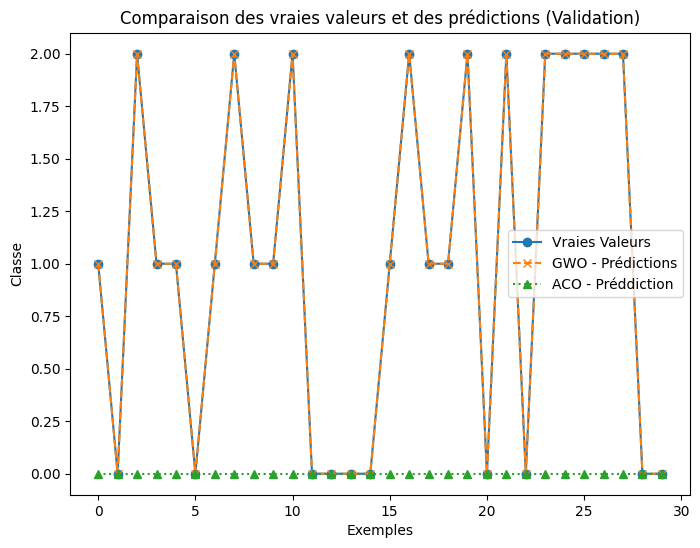

In [16]:
# Visualisation des résultats
plt.figure(figsize=(8, 6))
plt.plot(y_val.argmax(axis=1), label="Vraies Valeurs", marker='o')
plt.plot(val_predictions_gwo.argmax(axis=1), label="GWO - Prédictions", linestyle='--', marker='x')
plt.plot(val_predictions_aco.argmax(axis=1), label="ACO - Préddiction",  linestyle=':', marker='^')
plt.legend()
plt.title("Comparaison des vraies valeurs et des prédictions (Validation)")
plt.xlabel("Exemples")
plt.ylabel("Classe")
plt.show()